<a href="https://www.kaggle.com/code/nickkrikota/eda-cleaning-and-reshaping-the-dataset?scriptVersionId=160174088" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

In this notebook, we will take a look at how we can transform a dataframe from long to wide as well as which conclusions could be reached with this information.

In [1]:
# Import libraries 

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

print('Imported Successfully')

Imported Successfully


In [2]:
# Load data, check shape

df = pd.read_csv('/kaggle/input/landline-internet-subscriptions-by-download-speed/landline-internet-subscriptions-by-speed.csv')
print('Columns, rows:', df.shape)

Columns, rows: (1683, 6)


In [3]:
# Preview dataframe

df

,Entity,Code,Year,"17.6.1 - Number of fixed broadband subscriptions, by speed (number) - IT_NET_BBNDN - 10 mbps and over","17.6.1 - Number of fixed broadband subscriptions, by speed (number) - IT_NET_BBNDN - Between 2 mbps and 10 mbps","17.6.1 - Number of fixed broadband subscriptions, by speed (number) - IT_NET_BBNDN - Between 256 kbps and 2 mbps"
0,Afghanistan,AFG,2015,350.0,164.0,6553.0
1,Afghanistan,AFG,2016,500.0,131.0,8170.0
2,Afghanistan,AFG,2017,31.0,533.0,8618.0
3,Afghanistan,AFG,2018,144.0,734.0,15121.0
4,Afghanistan,AFG,2019,191.0,879.0,18613.0
...,...,...,...,...,...,...
1678,Zimbabwe,ZWE,2018,10379.0,52682.0,139995.0
1679,Zimbabwe,ZWE,2019,12876.0,59028.0,132520.0
1680,Zimbabwe,ZWE,2020,16476.0,61893.0,125092.0
1681,Zimbabwe,ZWE,2021,22583.0,82456.0,100294.0


# Cleaning the Data

A first good step would be to rename and rearrange the columns to make them more understandable.

In [4]:
# Rename columns, drop 'Code'

df = df.rename(columns={'Entity': 'Country',
                   '17.6.1 - Number of fixed broadband subscriptions, by speed (number) - IT_NET_BBNDN - 10 mbps and over': '10mbps',
                   '17.6.1 - Number of fixed broadband subscriptions, by speed (number) - IT_NET_BBNDN - Between 2 mbps and 10 mbps': '2mbps',
                   '17.6.1 - Number of fixed broadband subscriptions, by speed (number) - IT_NET_BBNDN - Between 256 kbps and 2 mbps': '256kbps',
                  })

df = df.drop(columns = 'Code')

df

,Country,Year,10mbps,2mbps,256kbps
0,Afghanistan,2015,350.0,164.0,6553.0
1,Afghanistan,2016,500.0,131.0,8170.0
2,Afghanistan,2017,31.0,533.0,8618.0
3,Afghanistan,2018,144.0,734.0,15121.0
4,Afghanistan,2019,191.0,879.0,18613.0
...,...,...,...,...,...
1678,Zimbabwe,2018,10379.0,52682.0,139995.0
1679,Zimbabwe,2019,12876.0,59028.0,132520.0
1680,Zimbabwe,2020,16476.0,61893.0,125092.0
1681,Zimbabwe,2021,22583.0,82456.0,100294.0


In [5]:
# Rearrange columns to go from slowest speed to faster

df = df[['Country', 'Year', '256kbps', '2mbps', '10mbps']]
df

,Country,Year,256kbps,2mbps,10mbps
0,Afghanistan,2015,6553.0,164.0,350.0
1,Afghanistan,2016,8170.0,131.0,500.0
2,Afghanistan,2017,8618.0,533.0,31.0
3,Afghanistan,2018,15121.0,734.0,144.0
4,Afghanistan,2019,18613.0,879.0,191.0
...,...,...,...,...,...
1678,Zimbabwe,2018,139995.0,52682.0,10379.0
1679,Zimbabwe,2019,132520.0,59028.0,12876.0
1680,Zimbabwe,2020,125092.0,61893.0,16476.0
1681,Zimbabwe,2021,100294.0,82456.0,22583.0


Then we can proceed to cleaning the data through ways such as dealing with Null values.

In [6]:
# See number of records for each year

df['Year'].value_counts()

Year
2017    167
2018    159
2019    155
2016    153
2021    146
2015    144
2020    144
2014    112
2012    101
2011     94
2013     92
2010     81
2009     67
2008     40
2007     24
2006      2
2004      1
2005      1
Name: count, dtype: int64

In [7]:
# See number of null values

df.isna().sum()

Country      0
Year         0
256kbps     95
2mbps       91
10mbps     140
dtype: int64

In [8]:
# Fill null values

df = df.fillna(method='ffill')
df.isna().sum()

Country    0
Year       0
256kbps    0
2mbps      0
10mbps     0
dtype: int64

# Reshaping the Data

Now the data can be reshaped to help with the analysis.

In [9]:
# Split dataframe into three by speed 

df256kbps = df.drop(columns=['2mbps','10mbps']).copy()
df256kbps = df256kbps.rename(columns={'256kbps': 'Subscriptions'})
df2mbps = df.drop(columns=['256kbps', '10mbps']).copy()
df2mbps = df2mbps.rename(columns={'2mbps': 'Subscriptions'})
df10mbps = df.drop(columns=['256kbps', '2mbps']).copy()
df10mbps = df10mbps.rename(columns={'10mbps': 'Subscriptions'})
df256kbps

,Country,Year,Subscriptions
0,Afghanistan,2015,6553.0
1,Afghanistan,2016,8170.0
2,Afghanistan,2017,8618.0
3,Afghanistan,2018,15121.0
4,Afghanistan,2019,18613.0
...,...,...,...
1678,Zimbabwe,2018,139995.0
1679,Zimbabwe,2019,132520.0
1680,Zimbabwe,2020,125092.0
1681,Zimbabwe,2021,100294.0


In [10]:
# Transform dataframes from long to wide, 
# Fill empty years with previous values, 
# Replace null with zero
# Change datatype to int

df256kbps = df256kbps.pivot(index = 'Country', columns = 'Year', values= 'Subscriptions')
df256kbps = df256kbps.fillna(method='ffill', axis=1)
df256kbps = df256kbps = df256kbps.fillna(0)
df256kbps = df256kbps.astype(int)

df2mbps = df2mbps.pivot(index = 'Country', columns = 'Year', values= 'Subscriptions')
df2mbps = df2mbps.fillna(method='ffill', axis=1)
df2mbps = df2mbps = df2mbps.fillna(0)
df2mbps = df2mbps.astype(int)

df10mbps = df10mbps.pivot(index = 'Country', columns = 'Year', values= 'Subscriptions')
df10mbps = df10mbps.fillna(method='ffill', axis=1)
df10mbps = df10mbps = df10mbps.fillna(0)
df10mbps = df10mbps.astype(int)

df256kbps

Year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,6553,8170,8618,15121,18613,25343,25343
Algeria,0,0,0,0,0,0,0,0,0,0,973977,1073883,1104499,1109910,7999,6691,6002,5663
Andorra,0,0,0,0,0,13608,10565,6599,4203,1179,116,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,8350,10780,14830,30825,13160,20102,33194,35802,28391,133955,27616
Antigua and Barbuda,0,0,0,0,0,0,0,0,4005,3094,6923,6923,3655,3655,3655,3655,3655,3655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,1195091,1248751,1410897,1569652,1982893,1692253,1592468,1706997,1584523,1619711,1613831,825150
Vietnam,0,0,0,0,0,0,0,0,0,0,0,15592,23666,13619,11783,14404,22066,9153
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,9153,9153,9153,9153,9153


# Graphing the Data

Visualizing the data can help to make sense of it.

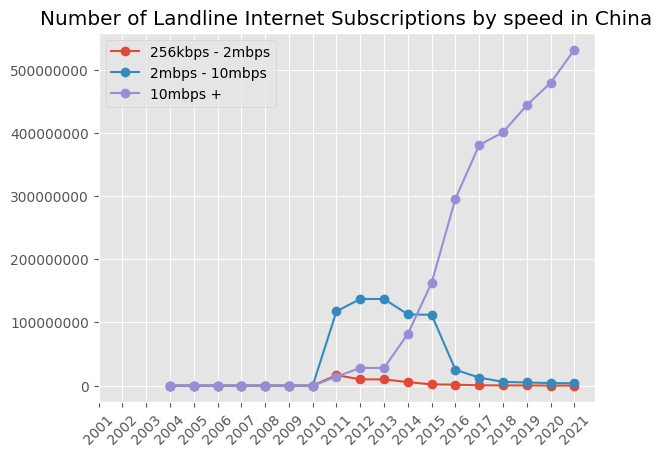

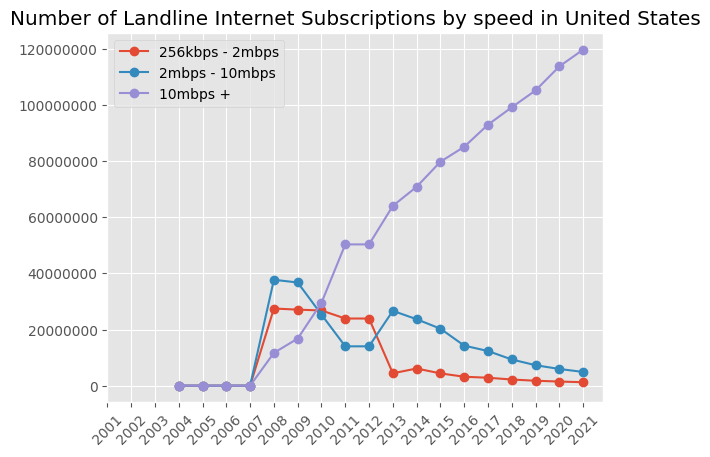

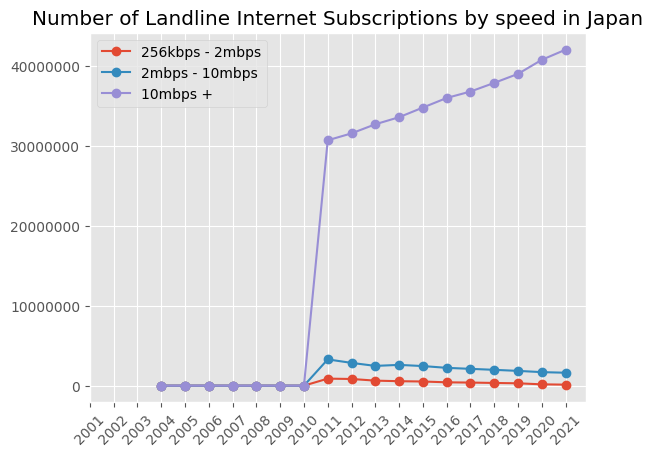

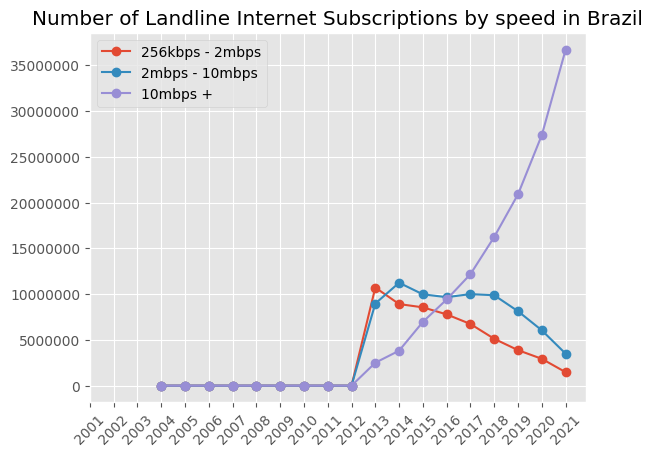

In [11]:
# Plot internet subscription numbers

plt.plot(df256kbps.loc['China'], label='256kbps - 2mbps', marker = 'o')
plt.plot(df2mbps.loc['China'], label='2mbps - 10mbps', marker = 'o')
plt.plot(df10mbps.loc['China'], label='10mbps +', marker = 'o')
plt.xticks(range(2001, 2022),rotation = 45)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Number of Landline Internet Subscriptions by speed in China')
plt.legend()
plt.show()

plt.plot(df256kbps.loc['United States'], label='256kbps - 2mbps', marker = 'o')
plt.plot(df2mbps.loc['United States'], label='2mbps - 10mbps', marker = 'o')
plt.plot(df10mbps.loc['United States'], label='10mbps +', marker = 'o')
plt.xticks(range(2001, 2022),rotation = 45)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Number of Landline Internet Subscriptions by speed in United States')
plt.legend()
plt.show()

plt.plot(df256kbps.loc['Japan'], label='256kbps - 2mbps', marker = 'o')
plt.plot(df2mbps.loc['Japan'], label='2mbps - 10mbps', marker = 'o')
plt.plot(df10mbps.loc['Japan'], label='10mbps +', marker = 'o')
plt.xticks(range(2001, 2022),rotation = 45)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Number of Landline Internet Subscriptions by speed in Japan')
plt.legend()
plt.show()

plt.plot(df256kbps.loc['Brazil'], label='256kbps - 2mbps', marker = 'o')
plt.plot(df2mbps.loc['Brazil'], label='2mbps - 10mbps', marker = 'o')
plt.plot(df10mbps.loc['Brazil'], label='10mbps +', marker = 'o')
plt.xticks(range(2001, 2022),rotation = 45)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Number of Landline Internet Subscriptions by speed in Brazil')
plt.legend()
plt.show()

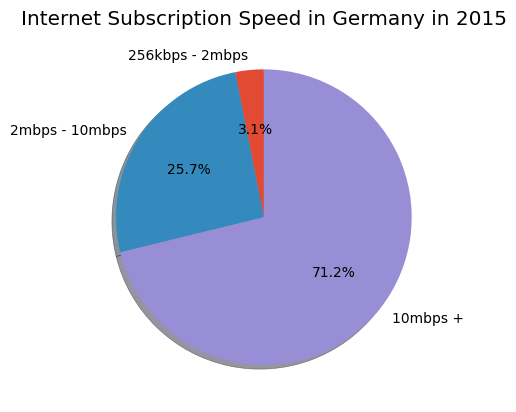

In [12]:
# Create a pie chart for Germany's internet speed subscriptions

germany = {
    'Speed': ['256kbps - 2mbps', '2mbps - 10mbps', '10mbps +'],
    'Number': [df256kbps.loc['Germany', 2015], df2mbps.loc['Germany', 2015], df10mbps.loc['Germany', 2015]]
}

plt.pie(germany['Number'], labels=germany['Speed'], autopct='%1.1f%%', startangle=90, shadow=1)
plt.title('Internet Subscription Speed in Germany in 2015')
plt.show()

# Drawing Conclusions

What questions could be asked about this data and how could we answer them?

In [13]:
# What percentage of internet subscriptions in Sweden were for 256 kbps - 2 mbps in 2008?

percentage = int(round(
        df256kbps.loc['Sweden', 2008] / (
        df10mbps.loc['Sweden', 2008] + 
        df2mbps.loc['Sweden', 2008] + 
        df256kbps.loc['Sweden', 2008]), 2) * 100)

print(f"{percentage}% of internet subscriptions in Sweden were for 256 kbps - 2 mbps in 2008")

16% of internet subscriptions in Sweden were for 256 kbps - 2 mbps in 2008


In [14]:
# How many internet subscriptions in Italy were for over 10mbps in 2019?

print(f"{df10mbps.loc['Italy', 2019]} internet subscriptions in Italy were for over 10mbps in 2019")

13901801 internet subscriptions in Italy were for over 10mbps in 2019


In [15]:
# Which country had the most subscriptions for 2bmps - 10mbps internet in 2010?

print(f"{df2mbps.loc[:, 2010].idxmax()} had the most subscriptions for 2bmps - 10mbps internet in 2010")

United States had the most subscriptions for 2bmps - 10mbps internet in 2010
